# Consigne : 

À partir du projet ci-dessous :
- interpréter systématiquement les indicateurs de performance de l’intelligence artificielle : 
    - Graphiques.
    - Métriques.
    - Généralisation. 
    - Vérification d'absence de data leakage.
    - Choix des methodes d'encodage.
    - Visualiser une learning curve.
    
**Les interprétations concernent le projet existant et les améliorations que vous allez apporter.**

- à partir des éléments d’interprétation, définir les caractéristiques des améliorations à apporter,
- intégrer les améliorations à l'algorithme d’intelligence artificielle (Réaliser au moins 2 itérations de plus),
- communiquer une estimation de charge au regard du besoin d’évolution de l’application
    - le livrable peut être, par exemple : un notebook, un excel, ou power point.
- intégrer l’évolution fonctionnelle (réaliser au minimum une API à partir de ce projet).
- tester la non régression de l’application suite à l’intégration de l’évolution
    - implémenter au moins 3 tests unitaires.
    - Assurez vous de gérer les erreurs d'entrée utilisateurs : 
        - exemple : que ce passe t-il si l'utilisateur rentre une chaine de caractère (string) alors que le modèle attend un entier (integer).

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Récupération de la donnée

In [16]:
data = pd.read_csv('data/ds_salaries.csv', index_col=0)

In [17]:
data.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


**Définitions des colonnes :**



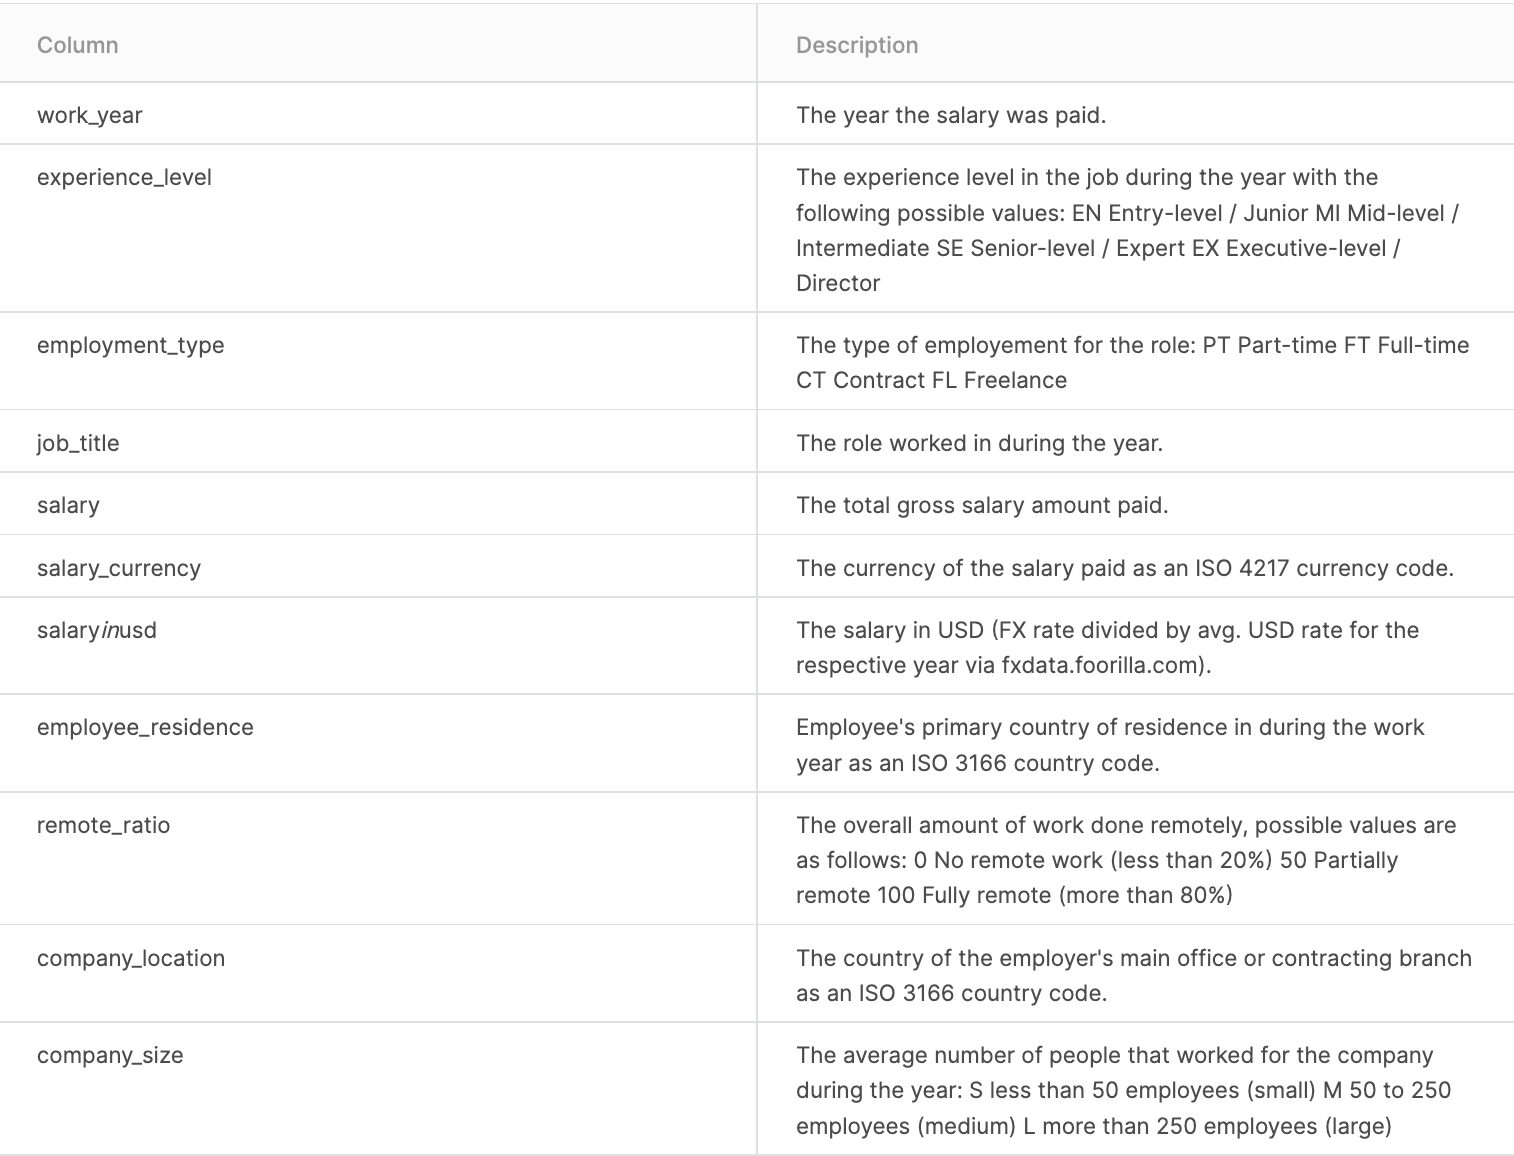

In [45]:
from IPython.display import Image
Image(filename='images/documentation.png') 

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [103]:
# for col in data.columns:
#     print(f"{col}:{len(data[col].unique())}")
for col in data.columns:
    print(f"{col}:{data[col].unique()}")

work_year:[2020 2021 2022]
experience_level:['MI' 'SE' 'EN' 'EX']
employment_type:['FT' 'CT' 'PT' 'FL']
job_title:['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 'Applied Machine Learning 

# - 1ère itération 

## Préparation de la données

In [5]:
data = data[['salary_in_usd','experience_level']]
data.head(2)

,salary_in_usd,experience_level
0,79833,MI
1,260000,SE


### Encodage de la colonne `experience_level` de manière ordinal

In [146]:
data['xp_encoded'] = data[['experience_level']].replace({'EN': 0}).replace({'MI': 1}).replace({'SE': 2}).replace({'EX': 3})



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   salary_in_usd     607 non-null    int64 
 1   experience_level  607 non-null    object
 2   xp_encoded        607 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 19.0+ KB


In [8]:
data = data.astype({'xp_encoded': int})

### Convertion de la colonne `salary_in_usd` en kilo $

In [9]:
data['salary_in_usd'] = data['salary_in_usd'] / 1000

data = data.astype({'salary_in_usd': int})

In [10]:
data

,salary_in_usd,experience_level,xp_encoded
0,79,MI,1
1,260,SE,2
2,109,SE,2
3,20,MI,1
4,150,SE,2
...,...,...,...
602,154,SE,2
603,126,SE,2
604,129,SE,2
605,150,SE,2


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   salary_in_usd     607 non-null    int64 
 1   experience_level  607 non-null    object
 2   xp_encoded        607 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 19.0+ KB


## Data visualisation

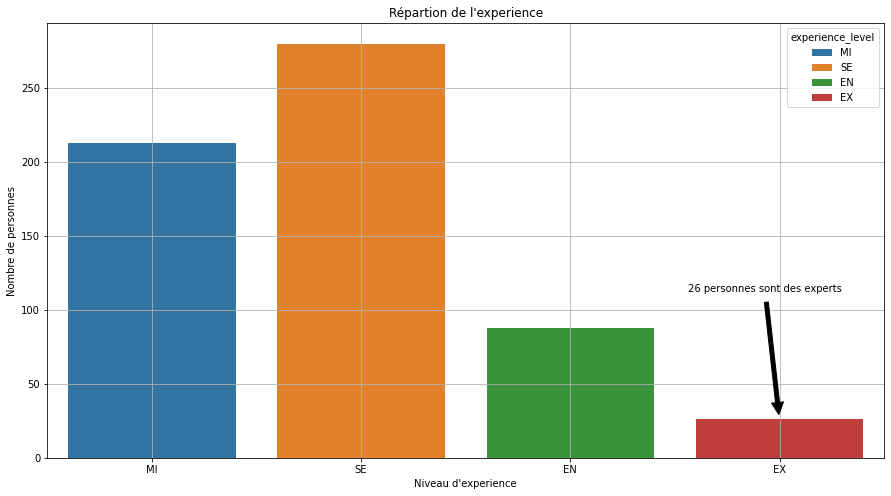

In [12]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data=data,x='experience_level', hue='experience_level',dodge=False)
ax.set_title("Répartion de l'experience")
ax.set_ylabel('Nombre de personnes')
ax.set_xlabel("Niveau d'experience")

ax.annotate('26 personnes sont des experts', xy=(3, 25),  xycoords='data',
            xytext=(0.95, 0.4), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
plt.grid(True)
plt.show()

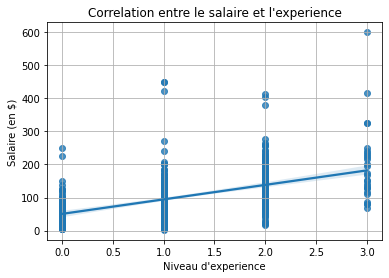

In [13]:
ax = sns.regplot(data=data,y='salary_in_usd', x='xp_encoded')
ax.set_title("Correlation entre le salaire et l'experience")
ax.set_ylabel('Salaire (en $)')
ax.set_xlabel("Niveau d'experience")
plt.grid(True)
plt.show()

**Il y a une corrélation positive entre le salaire et le niveau d'expérience**

## ML - 1ère itération

In [147]:
y = data['salary_in_usd']
X = data[['xp_encoded']]

In [15]:
#y

In [16]:
#X

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [149]:
cross_val_score(LinearRegression(),X_train,y_train, cv=5, scoring = "r2").mean()

0.11547551105680713

In [20]:
lr_1 = LinearRegression()

In [21]:
lr_1.fit(X_train,y_train)

LinearRegression()

In [22]:
lr_1.coef_

array([45.74363686])

`Interpreter : `

In [23]:
lr_1.score(X_test,y_test)

0.17677492181930476

`Interpreter : `

**Testing d'autres modèles**

In [150]:
cross_val_score(RandomForestRegressor(),X_train,y_train, cv=5).mean()

0.2767469032637643

In [151]:
cross_val_score(SVR(),X_train,y_train, cv=5).mean()

0.14714414392642708

# - 2 éme itération :

## Datavisualisation

In [113]:
data_2 = pd.read_csv('data/ds_salaries.csv', index_col=0)

In [114]:
data_2_group_count = data_2.groupby('job_title',as_index=False).count()
data_2_group_count = data_2_group_count[['job_title','work_year']]

In [115]:

data_2_group_mean = data_2.groupby('job_title',as_index=False).mean()[['job_title','salary_in_usd']].sort_values(by='salary_in_usd',ascending=False)


In [116]:
data_2_group_mean['salary_in_usd'] = data_2_group_mean['salary_in_usd'] / 1000
data_2_group_mean = data_2_group_mean.astype({'salary_in_usd': int})
data_2_group_mean = data_2_group_mean.rename(columns={'salary_in_usd': 'Salaire moyen ( en kilo $ )'})

In [30]:
data_2_group_mean_count = data_2_group_mean.merge(data_2_group_count,left_on='job_title',right_on='job_title')

In [31]:
data_2_group_mean_count = data_2_group_mean_count.rename(columns={'work_year': 'Nombre de salaire'})

In [32]:
data_2_group_mean_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   job_title                    50 non-null     object
 1   Salaire moyen ( en kilo $ )  50 non-null     int64 
 2   Nombre de salaire            50 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.6+ KB


In [33]:
data_2_group_mean_count

,job_title,Salaire moyen ( en kilo $ ),Nombre de salaire
0,Data Analytics Lead,405,1
1,Principal Data Engineer,328,3
2,Financial Data Analyst,275,2
3,Principal Data Scientist,215,7
4,Director of Data Science,195,7
5,Data Architect,177,11
6,Applied Data Scientist,175,5
7,Analytics Engineer,175,4
8,Data Specialist,165,1
9,Head of Data,160,5


In [34]:
data_2_group_mean_count[[data_2_group_mean_count.columns[2]]]

,Nombre de salaire
0,1
1,3
2,2
3,7
4,7
5,11
6,5
7,4
8,1
9,5


In [35]:
data_2_group_mean_count

,job_title,Salaire moyen ( en kilo $ ),Nombre de salaire
0,Data Analytics Lead,405,1
1,Principal Data Engineer,328,3
2,Financial Data Analyst,275,2
3,Principal Data Scientist,215,7
4,Director of Data Science,195,7
5,Data Architect,177,11
6,Applied Data Scientist,175,5
7,Analytics Engineer,175,4
8,Data Specialist,165,1
9,Head of Data,160,5


In [36]:
data_2_group_mean_count.head(2).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   job_title                    2 non-null      object
 1   Salaire moyen ( en kilo $ )  2 non-null      int64 
 2   Nombre de salaire            2 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 64.0+ bytes


In [37]:
data_2_group_mean_count

,job_title,Salaire moyen ( en kilo $ ),Nombre de salaire
0,Data Analytics Lead,405,1
1,Principal Data Engineer,328,3
2,Financial Data Analyst,275,2
3,Principal Data Scientist,215,7
4,Director of Data Science,195,7
5,Data Architect,177,11
6,Applied Data Scientist,175,5
7,Analytics Engineer,175,4
8,Data Specialist,165,1
9,Head of Data,160,5


In [38]:
y = data_2_group_mean_count['Salaire moyen ( en kilo $ )']
x = data_2_group_mean_count['job_title']

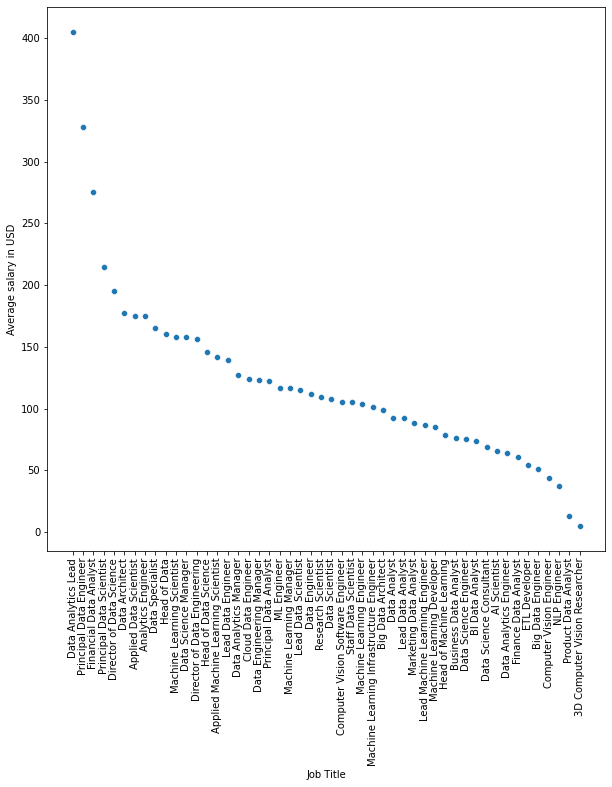

In [102]:
plt.figure(figsize=(18,18))

sns.scatterplot(x=x, y=y)

plt.xlabel('Job Title')
plt.ylabel('Average salary in USD')
plt.xticks(rotation=90)  
plt.show()

# Data visualization (improvement)

In [280]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [281]:
df = pd.read_csv('data/ds_salaries.csv', index_col=0)
df = df.drop_duplicates()
df["salary"]=df["salary"]/1000
df["salary_in_usd"] = df["salary_in_usd"]/1000 

In [282]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [283]:
df["experience_level"].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [284]:
# Descriptive Statistics
print(df.describe())

         work_year        salary  salary_in_usd  remote_ratio
count   565.000000    565.000000     565.000000    565.000000
mean   2021.364602    338.115986     110.610343     69.911504
std       0.698138   1599.878789      72.280703     40.900666
min    2020.000000      4.000000       2.859000      0.000000
25%    2021.000000     67.000000      60.757000     50.000000
50%    2021.000000    110.925000     100.000000    100.000000
75%    2022.000000    165.000000     150.000000    100.000000
max    2022.000000  30400.000000     600.000000    100.000000


In [285]:
# Correlation Analysis
corr_matrix = df.corr()
print(corr_matrix)

               work_year    salary  salary_in_usd  remote_ratio
work_year       1.000000 -0.082597       0.159326      0.058879
salary         -0.082597  1.000000      -0.083728     -0.012279
salary_in_usd   0.159326 -0.083728       1.000000      0.122849
remote_ratio    0.058879 -0.012279       0.122849      1.000000


In [286]:
# Grouped Analysis
print(df.groupby('experience_level')['salary_in_usd'].mean())

experience_level
EN     61.643318
EX    199.392038
MI     87.792995
SE    138.374881
Name: salary_in_usd, dtype: float64


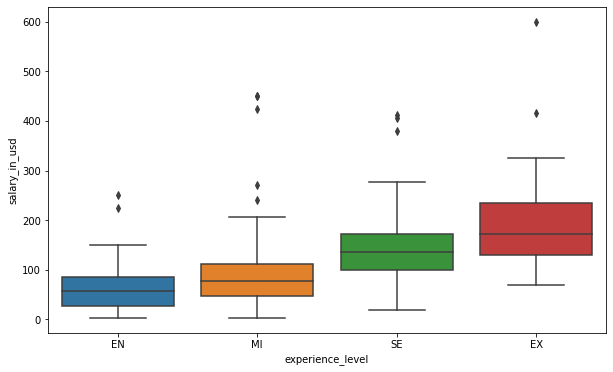

In [287]:
# Data Visualization
# Box plot Experience level & salary in usd
plt.figure(figsize=(10,6))
experience_order = ['EN', 'MI', 'SE', 'EX']
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=experience_order)
plt.show()

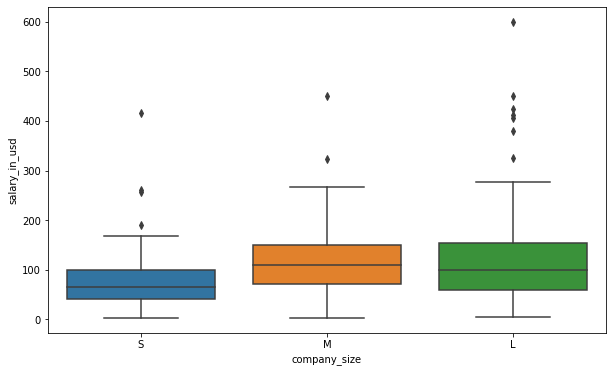

In [288]:
# Box plot Remote job & salary in usd
# Box plot Experience level & salary in usd
plt.figure(figsize=(10,6))
company_order = ['S', 'M', 'L']
sns.boxplot(x='company_size', y='salary_in_usd', data=df, order=company_order)
plt.show()

In [289]:
df["employment_type"].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

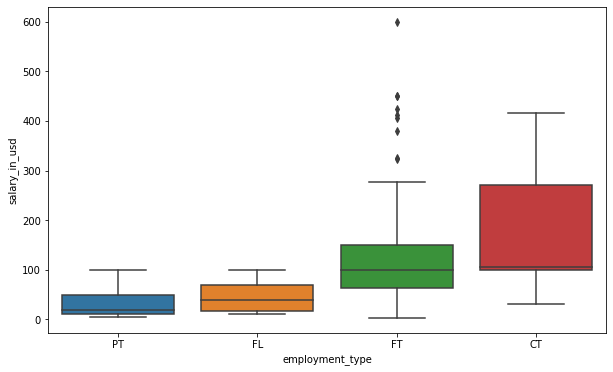

In [290]:
# Box plot Employment type  & salary in usd
plt.figure(figsize=(10,6))
employment_type_order = ['PT', 'FL', 'FT', "CT"]
sns.boxplot(x='employment_type', y='salary_in_usd', data=df, 
            order=employment_type_order)
plt.show()

In [291]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [292]:
job_title_counts = df['company_location'].value_counts()
job_title_counts[:10].index.to_list()

['US', 'GB', 'CA', 'DE', 'IN', 'FR', 'ES', 'GR', 'JP', 'NL']

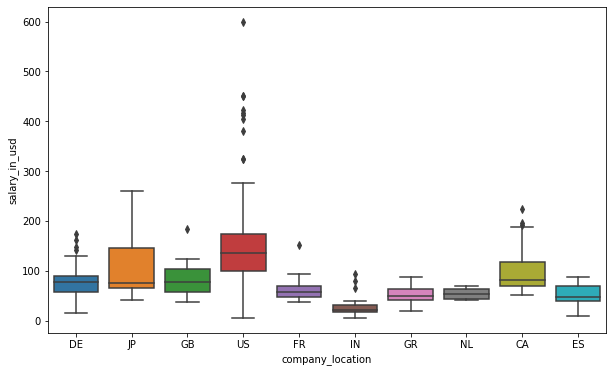

In [293]:
# Box plot Top 10 Company location  & salary in usd

plt.figure(figsize=(10,6))
# Count the frequency of each job title
job_title_counts = df['company_location'].value_counts()

# Get the top 5 job titles
top_10_locations = job_title_counts[:10].index.to_list()

top_10_locations_df = df[df['company_location'].isin(top_10_locations)]

sns.boxplot(x='company_location', y='salary_in_usd', data=top_10_locations_df)
plt.show()

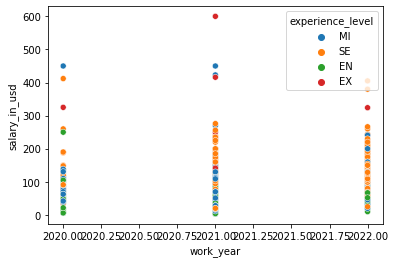

In [294]:
# Scatter plot
sns.scatterplot(x='work_year', y='salary_in_usd', hue='experience_level', data=df)
plt.show()

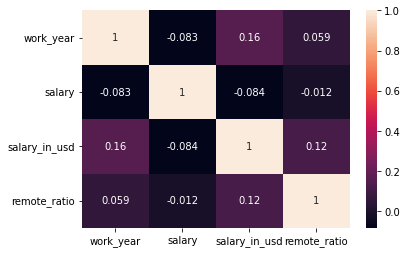

In [295]:
# Heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()

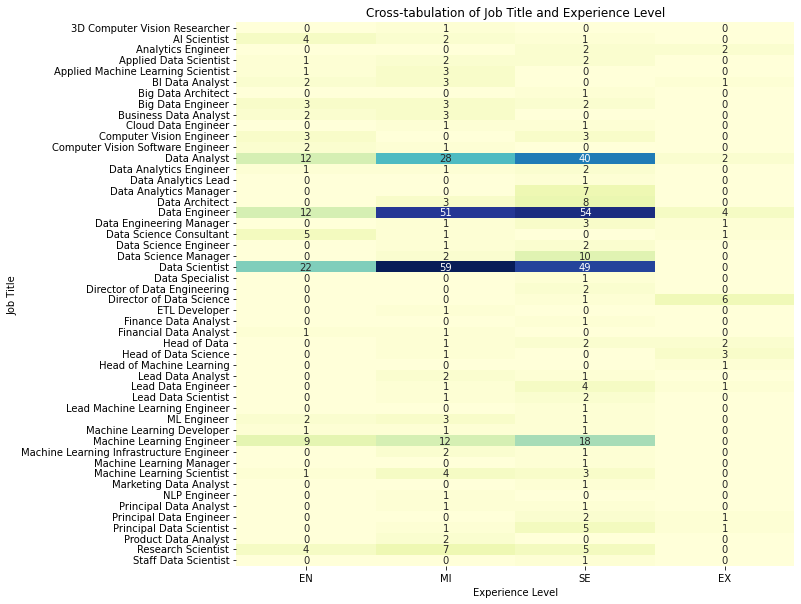

In [296]:
# Cross-tabulation of job title and experience level
cross_tab = pd.crosstab(df['job_title'], df['experience_level'])
experience_order = ['EN', 'MI', 'SE', 'EX']
cross_tab_reodered = cross_tab[experience_order]
# Use seaborn to create a heatmap
plt.figure(figsize=(10,10)) 
sns.heatmap(cross_tab_reodered, annot=True, cmap="YlGnBu", cbar=False)

plt.title('Cross-tabulation of Job Title and Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Job Title')
plt.show()

In [297]:
df["remote_ratio"].unique()

array([  0,  50, 100])

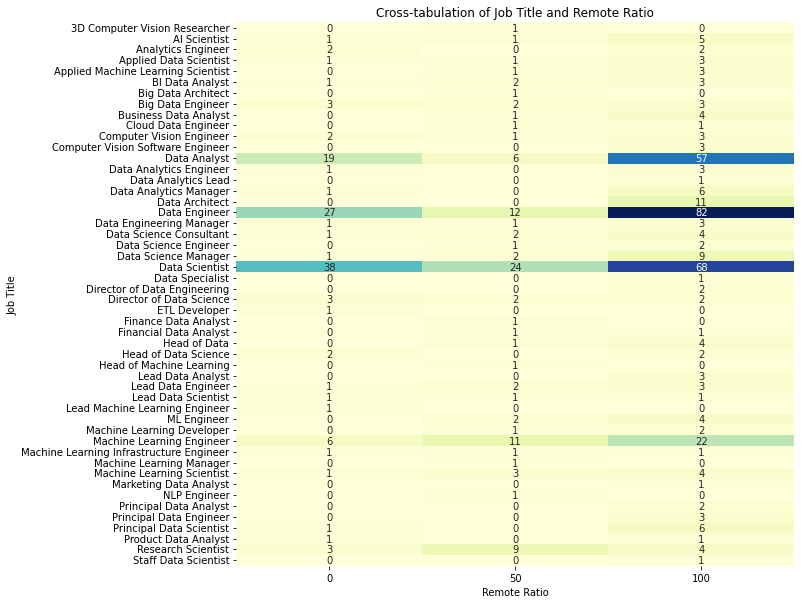

In [298]:
# Cross-tabulation of job title and remote ratio 
cross_tab = pd.crosstab(df['job_title'], df['remote_ratio'])
remote_ratio_order = [0,  50, 100]
cross_tab_reodered = cross_tab[remote_ratio_order]
plt.figure(figsize=(10,10))
sns.heatmap(cross_tab_reodered, annot=True, cmap="YlGnBu", cbar=False)

plt.title('Cross-tabulation of Job Title and Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Job Title')
plt.show()

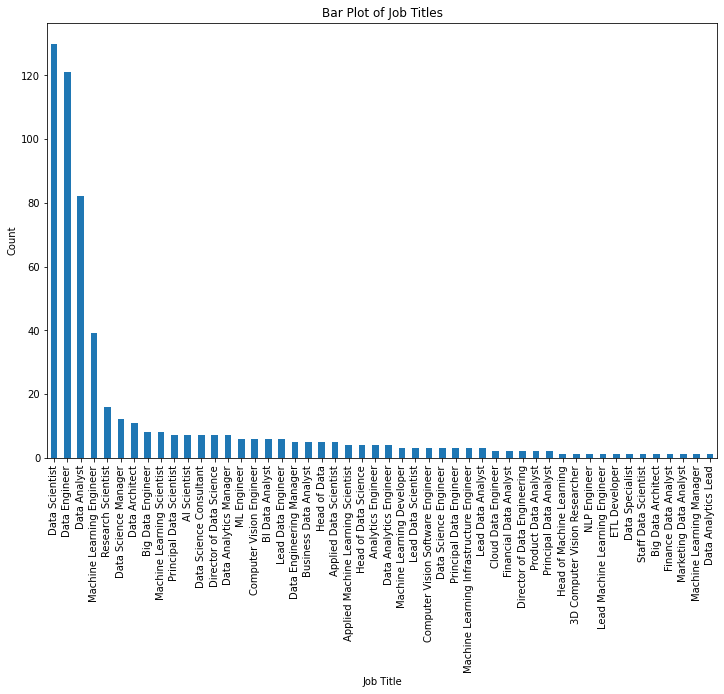

In [299]:
# Count the frequency of each job title
job_title_counts = df['job_title'].value_counts()

# Create a bar plot of the counts
plt.figure(figsize=(12, 8))  # adjust as needed
job_title_counts.plot(kind='bar')
plt.title('Bar Plot of Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=90)  # rotates x-axis labels for better readability
plt.show()

In [300]:
df["experience_level"].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

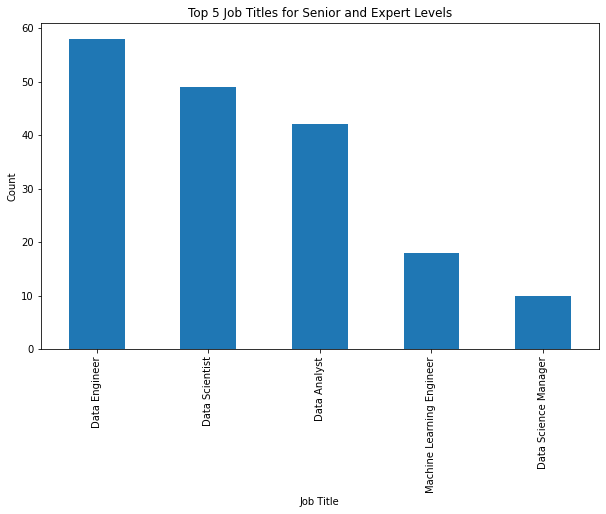

In [301]:
# Filter DataFrame to include only 'senior' and 'expert' levels
senior_expert_df = df[df['experience_level'].isin(['SE', 'EX'])]

# Count the frequency of each job title
job_title_counts = senior_expert_df['job_title'].value_counts()

# Get the top 5 job titles
top_5_job_titles = job_title_counts[:5]

# Create a bar plot of the counts
plt.figure(figsize=(10, 6))  # adjust as needed
top_5_job_titles.plot(kind='bar')
plt.title('Top 5 Job Titles for Senior and Expert Levels')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.show()

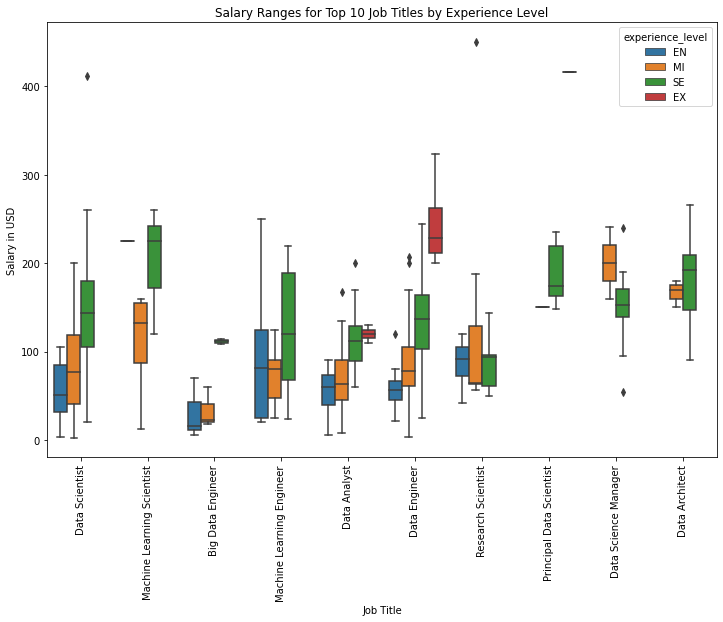

In [302]:
# Range of the salary in USD for Top 10 job titles

# Get the top 10 job titles
top_10_job_titles = df['job_title'].value_counts().index[:10]

# Filter the DataFrame to include only the top 10 job titles
filtered_df = df[df['job_title'].isin(top_10_job_titles)]

# Create a boxplot of salaries for each job title, with different colors for each experience level
plt.figure(figsize=(12, 8))  # adjust as needed
sns.boxplot(x='job_title', y='salary_in_usd', hue='experience_level', data=filtered_df, hue_order=experience_order)
plt.title('Salary Ranges for Top 10 Job Titles by Experience Level')
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.xticks(rotation=90)  # rotates x-axis labels for better readability
plt.show()

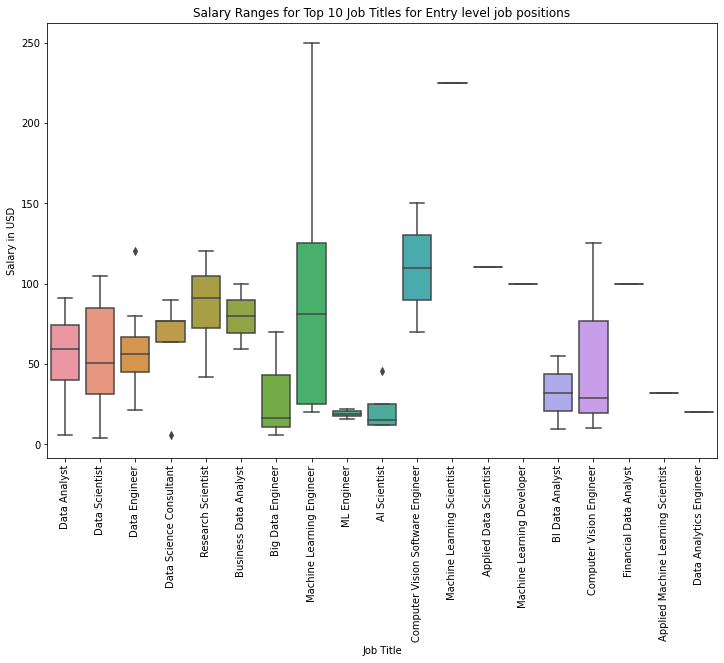

In [303]:
# Filter the DataFrame to include only the top entry level jobs
filtered_df = df[df['experience_level'].isin(["EN"])]

# Create a boxplot of salaries for each job title, with different colors for each experience level
plt.figure(figsize=(12, 8))  # adjust as needed
sns.boxplot(x='job_title', y='salary_in_usd', data=filtered_df)
plt.title('Salary Ranges for Top 10 Job Titles for Entry level job positions')
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.xticks(rotation=90)  # rotates x-axis labels for better readability
plt.show()

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           565 non-null    int64  
 1   experience_level    565 non-null    object 
 2   employment_type     565 non-null    object 
 3   job_title           565 non-null    object 
 4   salary              565 non-null    float64
 5   salary_currency     565 non-null    object 
 6   salary_in_usd       565 non-null    float64
 7   employee_residence  565 non-null    object 
 8   remote_ratio        565 non-null    int64  
 9   company_location    565 non-null    object 
 10  company_size        565 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 53.0+ KB


In [305]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

# Modeling (improvement)

In [370]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.model_selection import learning_curve

In [371]:
df = pd.read_csv('data/ds_salaries.csv', index_col=0)
df = df.drop_duplicates()
df["salary"]=df["salary"]/1000
df["salary_in_usd"] = df["salary_in_usd"]/1000 

In [327]:
def plot_learning_curve(model, X_train, y_train):
    # Generate learning curve data
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X_train, y_train, cv=5)

    # Calculate the average scores across all folds
    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)    
    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training score')
    plt.plot(train_sizes, validation_scores_mean, label='Validation score')
    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.title(f"{str(model)}")
    plt.legend(loc='best')
    plt.grid()
    plt.show()

## Linear regression model base on experience_level, company and employment type

In [328]:
feature_columns = ['experience_level', 'employment_type', "company_size" ]
target_column = 'salary_in_usd'

# Define the encoder for experience_level and employment_type
ordinal_encoder = OrdinalEncoder(categories=[['EN', 'MI', 'SE', 'EX'], ['PT', 'FL', 'FT', 'CT']])

# Define the encoder for company_location
one_hot_encoder = OneHotEncoder(sparse=False)

# Define the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_encoder, ["experience_level", "employment_type"]),
        ('onehot', one_hot_encoder, ["company_size"])
    ])


df_preprocessed = preprocessor.fit_transform(df[feature_columns])


# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    df_preprocessed,  # features
    df[target_column],  # target
    test_size=0.2,
    random_state=0
)

# Define the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the target for the test set
y_pred = model.predict(X_test)

# Calculate the root mean squared error of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f"R2 score: {r2}")

Root Mean Squared Error: 69.70003377730546
R2 score: 0.233388692812188


### Learning Curve

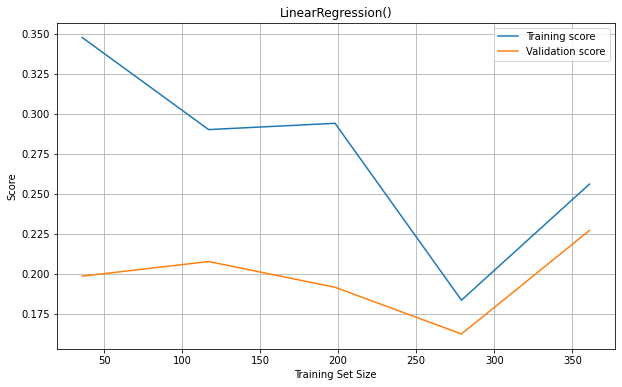

In [329]:
plot_learning_curve(model, X_train, y_train)

## Random Forest Regressor based on 3 parameters

In [330]:
# Define the model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict the target for the test set
y_pred = model.predict(X_test)

# Calculate the root mean squared error of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f"R2 score: {r2}")

Root Mean Squared Error: 71.80869455013695
R2 score: 0.18630189132710318


In [331]:
cross_val_score(RandomForestRegressor(),X_train,y_train, cv=5).mean()

0.1972349700611988

### Learning curve

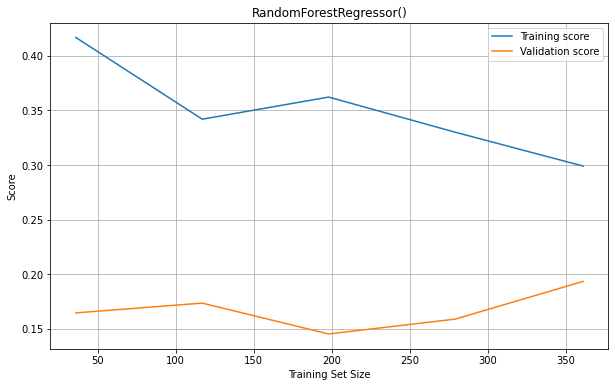

In [332]:
plot_learning_curve(model, X_train, y_train)

## Random  forest regressor improved
Model based on all previously categorized parameters

In [369]:
#Use label encoding to convert cat to numbers

data = df

data['work_year']=data['work_year'].astype('category')
data['experience_level']=data['experience_level'].astype('category')
data['employment_type']=data['employment_type'].astype('category')
data['job_title']=data['job_title'].astype('category')
data['remote_ratio']=data['remote_ratio'].astype('category')
data['company_location']=data['company_location'].astype('category')
data['company_size']=data['company_size'].astype('category')
data['employee_residence']=data['employee_residence'].astype('category')


#label encoding
data['work_year']=data['work_year'].cat.codes
data['experience_level']=data['experience_level'].cat.codes
data['employment_type']=data['employment_type'].cat.codes
data['job_title']=data['job_title'].cat.codes
data['remote_ratio']=data['remote_ratio'].cat.codes
data['company_location']=data['company_location'].cat.codes
data['company_size']=data['company_size'].cat.codes
data['employee_residence']=data['employee_residence'].cat.codes


corr=data.corr()
corr.style.background_gradient(cmap='coolwarm')

,work_year,experience_level,employment_type,job_title,salary,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,1.000000,0.267000,0.015092,-0.151328,-0.082597,0.159326,0.167429,0.058879,0.157108,0.066223
experience_level,0.267000,1.000000,-0.046307,0.037776,-0.017809,0.305962,0.200671,0.030381,0.224652,-0.078228
employment_type,0.015092,-0.046307,1.000000,-0.102797,0.000791,-0.126396,-0.114464,-0.047753,-0.087112,0.034656
job_title,-0.151328,0.037776,-0.102797,1.000000,0.025038,0.132225,-0.114186,-0.036936,-0.144619,-0.025978
salary,-0.082597,-0.017809,0.000791,0.025038,1.000000,-0.083728,-0.104575,-0.012279,-0.081396,-0.079308
salary_in_usd,0.159326,0.305962,-0.126396,0.132225,-0.083728,1.000000,0.447525,0.122849,0.423339,-0.152010
employee_residence,0.167429,0.200671,-0.114464,-0.114186,-0.104575,0.447525,1.000000,0.147726,0.891646,-0.094285
remote_ratio,0.058879,0.030381,-0.047753,-0.036936,-0.012279,0.122849,0.147726,1.000000,0.161352,0.020068
company_location,0.157108,0.224652,-0.087112,-0.144619,-0.081396,0.423339,0.891646,0.161352,1.000000,-0.077848
company_size,0.066223,-0.078228,0.034656,-0.025978,-0.079308,-0.152010,-0.094285,0.020068,-0.077848,1.000000


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2,2,22,70.0,EUR,79.833,14,0,12,0
1,0,3,2,41,260.0,USD,260.000,32,0,29,2
2,0,3,2,7,85.0,GBP,109.024,20,1,18,1
3,0,2,2,47,20.0,USD,20.000,23,0,20,2
4,0,3,2,38,150.0,USD,150.000,55,1,48,0
...,...,...,...,...,...,...,...,...,...,...,...
602,2,3,2,17,154.0,USD,154.000,55,2,48,1
603,2,3,2,17,126.0,USD,126.000,55,2,48,1
604,2,3,2,12,129.0,USD,129.000,55,0,48,1
605,2,3,2,12,150.0,USD,150.000,55,2,48,1


In [334]:
#Remove outliers from the target column
#calculating the three quartiles
Q1 = np.percentile(data["salary_in_usd"], 25, method = 'midpoint')
Q2 = np.percentile(data["salary_in_usd"], 50, method = 'midpoint')  
Q3 = np.percentile(data["salary_in_usd"], 75, method = 'midpoint')
IQR = Q3 - Q1 #calculating inter-quartile range
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)
outlier =[]
for x in data["salary_in_usd"]:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print('Outlier in the dataset is', outlier) #printing outliers

Interquartile range is 89.243
low_limit is -73.10749999999999
up_limit is 283.8645
Outlier in the dataset is [325.0, 450.0, 412.0, 450.0, 423.0, 416.0, 600.0, 324.0, 380.0, 405.0]


In [335]:
data.drop(data[data['salary_in_usd'] >= 324.].index, inplace = True) #dropping outliers

In [336]:
feature_columns = ['experience_level',
                   'company_location',
                   'work_year',
                   'company_size', 
                   "employment_type", 
                   "remote_ratio",
                  "employee_residence",
                   "job_title"]


X_train, X_test, y_train, y_test = train_test_split(
    data[feature_columns] , 
    data[target_column],  
    test_size=0.2,
    random_state=0
)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate the root mean squared error of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f"R2 score: {r2}")


Root Mean Squared Error: 50.1942511365578
R2 score: 0.40557450790017835


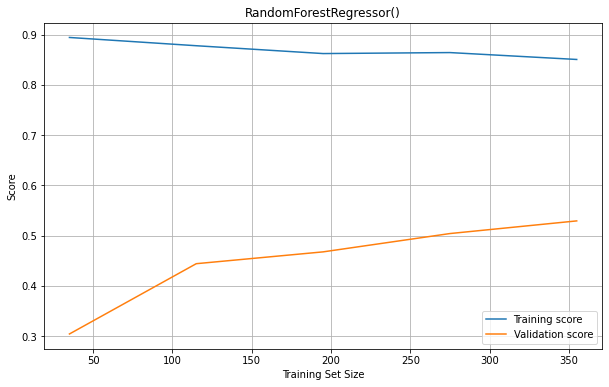

In [337]:
plot_learning_curve(model, X_train, y_train)

## Gradient Boosting Regressor

In [339]:
feature_columns = ['experience_level',
                   'company_location',
                   'work_year',
                   'company_size', 
                   "employment_type", 
                   "remote_ratio",
                  "employee_residence",
                   "job_title"]


X_train, X_test, y_train, y_test = train_test_split(
    data[feature_columns] , 
    data[target_column],  
    test_size=0.2,
    random_state=0
)

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate the root mean squared error of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f"R2 score: {r2}")


Root Mean Squared Error: 47.274458419189536
R2 score: 0.4727184297674746


### Learning Curve

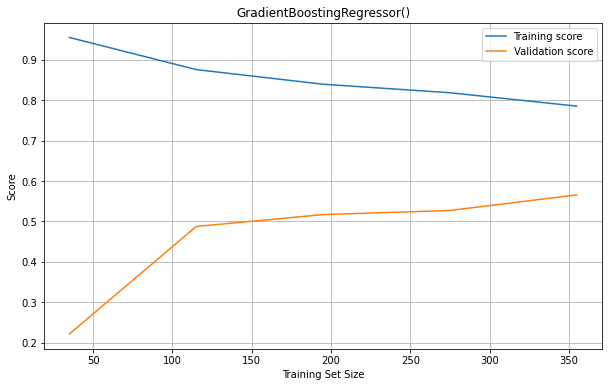

In [338]:
plot_learning_curve(GradientBoostingRegressor(), X_train, y_train)

### Prepare model for API


In [437]:
#features_to_encode
df = pd.read_csv('data/ds_salaries.csv', index_col=0)
df = df.drop_duplicates()
df = df.drop(['salary', 'salary_currency'], axis = 1)

df["salary_in_usd"] = df["salary_in_usd"]/1000 

target = 'salary_in_usd'

CAT_FEATURES = ['work_year', 
            'experience_level', 
            'employment_type',
            'job_title',
            'employee_residence',
            'remote_ratio',
            'company_location',
            'company_size'
           ]


def encode_data(df):

    # to keep the mapping dictionaries
    category_mappings = dict()
    df_encoded = df.copy()
    for col in CAT_FEATURES:
        df_encoded[col] = df[col].astype('category')
        df_encoded[col] = df_encoded[col].cat.codes
        category_mappings[col] = dict(enumerate(df[col].astype('category').cat.categories))
    return df_encoded, category_mappings

#decode
def decode_data(df, categorical_cols):
    df_decoded = df.copy()
    for col in categorical_cols:
        df_decoded[col] = df[col].map(category_mappings[col])
    return df_decoded


#Remove outliers from the target column
def remove_outliers(data, target):
    
    Q1 = np.percentile(data[target], 25, method = 'midpoint')
    Q2 = np.percentile(data[target], 50, method = 'midpoint')  
    Q3 = np.percentile(data[target], 75, method = 'midpoint')
    IQR = Q3 - Q1 #calculating inter-quartile range
    print('Interquartile range is', IQR)
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print('low_limit is', low_lim)
    print('up_limit is', up_lim)
    outlier =[]
    for x in data[target]:
        if ((x> up_lim) or (x<low_lim)):
             outlier.append(x)
    print('Outlier in the dataset is', outlier) #printing outliers
    if len(outlier)>0:
        outlier.sort()
        cut_max = outlier[0]
        data.drop(data[data[target] >= cut_max].index, inplace = True) #dropping outliers
        print(f"Successfully dropped outliers: {outlier}")
        return data
    else:
        print("No outliers!")
        return data

def apply_existing_encoding(df, category_mappings):
    df_encoded = df.copy()
    for col, mapping in category_mappings.items():
        cat_to_code = {v: k for k, v in mapping.items()}
        df_encoded[col] = df_encoded[col].map(cat_to_code).fillna(-1).astype(int)
    return df_encoded

# encode data
df_encoded, category_mappings = encode_data(df)

df_processed = remove_outliers(df_encoded, target)

##model
X_train, X_test, y_train, y_test = train_test_split(
    df_processed[CAT_FEATURES] , 
    df_processed[target],  
    test_size=0.2,
    random_state=0
)

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate the root mean squared error of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f"R2 score: {r2}")

#df_decoded = decode_data(df_test, category_mapping
#df_test

Interquartile range is 89.243
low_limit is -73.10749999999999
up_limit is 283.8645
Outlier in the dataset is [325.0, 450.0, 412.0, 450.0, 423.0, 416.0, 600.0, 324.0, 380.0, 405.0]
Successfully dropped outliers: [324.0, 325.0, 380.0, 405.0, 412.0, 416.0, 423.0, 450.0, 450.0, 600.0]
Root Mean Squared Error: 47.27720609054754
R2 score: 0.47265713499563256


In [449]:
# Save model 
from joblib import dump, load
dump(model, './models/GRB_regressor.joblib') 

['./models/GRB_regressor.joblib']

In [450]:
new_model = load('./models/GRB_regressor.joblib')

In [438]:
#{cat: df[cat].unique() for cat in df.columns}

In [439]:
df_encoded


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2,2,22,79.833,14,0,12,0
1,0,3,2,41,260.000,32,0,29,2
2,0,3,2,7,109.024,20,1,18,1
3,0,2,2,47,20.000,23,0,20,2
4,0,3,2,38,150.000,55,1,48,0
...,...,...,...,...,...,...,...,...,...
602,2,3,2,17,154.000,55,2,48,1
603,2,3,2,17,126.000,55,2,48,1
604,2,3,2,12,129.000,55,0,48,1
605,2,3,2,12,150.000,55,2,48,1


In [440]:
{cat: [] for cat in df_encoded.columns}

{'work_year': [],
 'experience_level': [],
 'employment_type': [],
 'job_title': [],
 'salary_in_usd': [],
 'employee_residence': [],
 'remote_ratio': [],
 'company_location': [],
 'company_size': []}

In [441]:
job_title = 'Data Scientist'
work_year = 2021
experience_level = 'MI'
employment_type = "FT"
employee_residence =  "US"
remote_ratio = 100
company_location = "FR"
company_size = "L"



def create_X(job_title, work_year, experience_level, employment_type, 
         employee_residence, remote_ratio, company_location, company_size):

    return pd.DataFrame({'work_year': [work_year],
     'experience_level': [experience_level],
     'employment_type': [employment_type],
     'job_title': [job_title],
     'employee_residence': [employee_residence],
     'remote_ratio': [remote_ratio],
     'company_location': [company_location],
     'company_size': [company_size]})

X = create_X(job_title, work_year, experience_level, employment_type, 
         employee_residence, remote_ratio, company_location, company_size)


In [442]:
X

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,US,100,FR,L


In [443]:
X_encoded = apply_existing_encoding(X, category_mappings)

In [451]:
new_model.predict(X_encoded)

array([125.43846119])

# API filter funciton

In [319]:
from fastapi import FastAPI, HTTPException
from typing import Optional, List
import pandas as pd
from enum import Enum

df = pd.read_csv('data/ds_salaries.csv', index_col=0)
df = df.drop_duplicates()
df["salary"]=df["salary"]/1000
df["salary_in_usd"] = df["salary_in_usd"]/1000 

class ExperienceLevel(str, Enum):
    EN = "EN"
    MI = "MI"
    SE = "SE"
    EX = "EX"

class EmploymentType(str, Enum):
    PT = "PT"
    FL = "FL"
    FT = "FT"
    CT = "CT"

In [320]:
#check for dublicates

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           565 non-null    int64  
 1   experience_level    565 non-null    object 
 2   employment_type     565 non-null    object 
 3   job_title           565 non-null    object 
 4   salary              565 non-null    float64
 5   salary_currency     565 non-null    object 
 6   salary_in_usd       565 non-null    float64
 7   employee_residence  565 non-null    object 
 8   remote_ratio        565 non-null    int64  
 9   company_location    565 non-null    object 
 10  company_size        565 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 53.0+ KB


In [321]:
df["job_title"].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [322]:
def get_salary_range_for_job(job_title: str,
                                   company_location: str = None,
                                   experience_level: ExperienceLevel = None,
                                   employment_type: EmploymentType = None) -> List[float]:
    
    if job_title not in df['job_title'].unique():
        raise HTTPException(status_code=400, detail=f"Invalid job_title. Please choose from {df['job_title'].unique().tolist()}")

    if company_location is not None and company_location not in df['company_location'].unique():
        raise HTTPException(status_code=400, detail=f"Invalid company_location. Please choose from {df['company_location'].unique().tolist()}")


    # Filter based on the provided parameters
    filter_conditions = (df['job_title'] == job_title)
    if company_location:
        filter_conditions &= (df['company_location'] == company_location)
    if experience_level:
        filter_conditions &= (df['experience_level'] == experience_level)
    if employment_type:
        filter_conditions &= (df['employment_type'] == employment_type)
    
    salary_range = df.loc[filter_conditions, 'salary_in_usd'].tolist()
    
    # Check if the salary_range list is empty
    if not salary_range:
        return {'message': 'No jobs are found with your request.'}

    salary_range.sort()
    
    return {'salary_range': salary_range}

In [323]:
get_salary_range_for_job(
    job_title="Director of Data Engineering", 
    experience_level = "EN",
    employment_type = "FL"
)

{'message': 'No jobs are found with your request.'}

In [324]:
job_title = "ETL Developer"
df_filtered = df[df['job_title'] == job_title]
df_filtered


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
373,2022,MI,FT,ETL Developer,50.0,EUR,54.957,GR,0,GR,M


## Filter function for an API

In [71]:
def salary_range_for_job(job_title: str, company_location: Optional[str] = None, 
                             experience_level: Optional[str] = None, employment_type: Optional[str] = None):
    df_filtered = df[df['job_title'] == job_title]
    
    if company_location is not None:
        df_filtered = df_filtered[df_filtered['company_location'] == company_location]
        if df_filtered.empty:
            return {"salary_range": []}
            
    if experience_level is not None:
        df_filtered = df_filtered[df_filtered['experience_level'] == experience_level]
        if df_filtered.empty:
            return {"salary_range": []}
            
    if employment_type is not None:
        df_filtered = df_filtered[df_filtered['employment_type'] == employment_type]
        if df_filtered.empty:
            return {"salary_range": []}
    
    salary_range = df_filtered['salary_in_usd'].tolist()
    salary_range.sort()
    
    return {"salary_range": salary_range}

In [72]:
get_salary_range_for_job(job_title = "BI Data Analyst", 
                 experience_level="EN", 
                # company_location = "DE"
                )

{'salary_range': [9.272, 55.0]}

## Unittest to test filter function

In [91]:
import unittest

In [76]:
df["job_title"].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [83]:
df[df["job_title"]=="Applied Machine Learning Scientist"]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
132,2021,MI,FT,Applied Machine Learning Scientist,38.4,USD,38.400,VN,100,US,M
157,2021,MI,FT,Applied Machine Learning Scientist,423.0,USD,423.000,US,50,US,L
489,2022,EN,CT,Applied Machine Learning Scientist,29.0,EUR,31.875,TN,100,CZ,M
506,2022,MI,FT,Applied Machine Learning Scientist,75.0,USD,75.000,BO,100,US,L


In [88]:
class TestSalaryRange(unittest.TestCase):

    def test_no_filter(self):
        result = salary_range_for_job('Applied Machine Learning Scientist')
        assert result == {"salary_range": [31.875, 38.400,75.000, 423.00]}

    def test_filter_empty(self):
        result = salary_range_for_job('Applied Machine Learning Scientist', company_location='FR')
        assert result == {"salary_range": []}

    def test_filter_non_empty(self):
        result = salary_range_for_job('Applied Machine Learning Scientist', company_location='US')
        assert result == {"salary_range": [38.400,75.000, 423.00]}

In [90]:
test_filter_empty()